In [26]:
!pip install findspark

In [27]:
import findspark
findspark.init("C:\\spark")

In [28]:
from pyspark import SparkContext

## Configurasyon ve Spark Bağlantısı

In [29]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder\
    .master("local")\
    .appName("pyspark_uygulama")\
    .config("spark.executer.memory","10gb")\
    .getOrCreate()
    

sc=spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

In [30]:
sc.version

'3.2.1'

In [31]:
sc.sparkUser()

'riza-'

In [32]:
sc.appName

'pyspark_uygulama'

In [33]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'bina

# Temel DataFrame İşlemleri

In [34]:
spark_df=spark.read.csv("diabetes.csv",header=True,inferSchema=True)

In [35]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [36]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [37]:
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [38]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [39]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","float64"])

In [40]:
type(df)

pandas.core.frame.DataFrame

In [41]:
df.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [42]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [43]:
df.dtypes

carat    float64
depth    float64
table    float64
x        float64
y        float64
z        float64
dtype: object

In [44]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [45]:
df.ndim

2

In [47]:
spark_df.show(2,truncate=True)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [48]:
spark_df.show(10)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [49]:
spark_df.count()

768

In [50]:
spark_df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [51]:
len(spark_df.columns)

9

In [52]:
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [53]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [54]:
spark_df.select("Glucose","Pregnancies").show(5)

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [55]:
spark_df.select("Glucose").distinct().count()

136

In [56]:
spark_df.select("Glucose").dropDuplicates().show()

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [57]:
spark_df.select("Glucose").dropDuplicates().count()

136

In [58]:
spark_df.crosstab("Outcome","Pregnancies").show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [59]:
spark_df.dropna().show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [60]:
spark_df.dropna().count()

768

### Gözlem Seçme

In [61]:
spark_df.filter(spark_df.Age>40).count()

194

In [62]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [63]:
spark_df.groupby("Outcome").agg({"BMI":"mean"}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [64]:
spark_df.withColumn("yeni_degisken",spark_df.BMI/2).select("BMI","yeni_degisken").show()

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
|25.6|         12.8|
|31.0|         15.5|
|35.3|        17.65|
|30.5|        15.25|
| 0.0|          0.0|
|37.6|         18.8|
|38.0|         19.0|
|27.1|        13.55|
|30.1|        15.05|
|25.8|         12.9|
|30.0|         15.0|
|45.8|         22.9|
|29.6|         14.8|
|43.3|        21.65|
|34.6|         17.3|
+----+-------------+
only showing top 20 rows



In [65]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [66]:
spark_df.drop("Insulın").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [67]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [68]:
a=spark_df.groupby("Outcome").count().toPandas()

In [69]:
a.iloc[0:1,0:1]

,Outcome
0,1


# SQL İşlemleri

In [70]:
sc

<SparkContext master=local appName=pyspark_uygulama>

In [71]:
spark_df.createOrReplaceTempView("table_df")

In [72]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [73]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         | table_df|       true|
+---------+---------+-----------+



In [74]:
spark.sql("Select Glucose from table_df").show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [75]:
spark.sql("Select Outcome,mean(Glucose) from table_df group by Outcome").show(5)

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



## Büyük Veri Görselleştirme

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
sns.barplot(x="Outcome",y=spark_df.Outcome.index,data=spark_df)

AttributeError: 'DataFrame' object has no attribute 'get'

In [80]:
sdf=spark_df.toPandas()
sdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


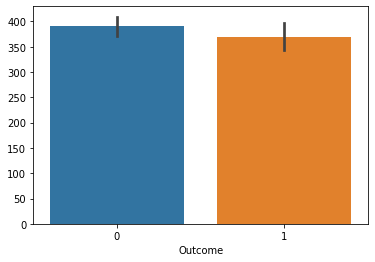

In [82]:
sns.barplot(x="Outcome",y=sdf.Outcome.index,data=sdf);